<a href="https://colab.research.google.com/github/JLucasM-eng/Python-Projects/blob/master/CAT168_%E2%80%93_TRABALHO_INDIVIDUAL_%7C_Jos%C3%A9_Lucas_1621590.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAM168 – TRABALHO INDIVIDUAL

Segue abaixo a resolução do trabalho individual aplicado pelo professor Agnaldo José da Rocha Reis, visando o aproveitamento extraordinário da diciplina Interfaceamento de Sistemas (CAT168).

Para a execução dos códigos, faz-se necessário observar os seguintes passos:

✅ Abrir o presente arquivo no ambiente Google Colaboratory, pois dessa forma não será necessário a instalação de nenhuma biblioteca. Todavia também é possivel executa-lo em outro ambiente de desenvolvimento, uma vez instalada todas as dependencias.

✅ É necessário que a pasta disponibilizada "dados_exercicios" esteja inserida na raiz do drive, para leitura dos dados.  

✅ Na guia "Ambiente de execução", clique em "Executar tudo" ou precione Ctrl + F9. 
</br>


## Questão 1
 *Considere o aparato ilustrado na Fig.11
. Um objeto está suspenso entre uma fonte de luz e duas células
solares (LDR). Variando-se a sua posição (y), variam-se as tensões v1 e v2 como apresentado na Fig.2.
Projete uma rede neural -motor de um sensor inferencial regressor- que determine a posição do objeto
(em polegadas) (ball_t.txt) a partir das tensões v1 e v2 (em volts) (ball_p.txt) (ver ex1.zip). Preze pela
parcimônia.* [texto do link](https://)
<br>
<br>

**Resolução | Questão 1:**
Vamos inicialmente realizar a importação das bibliotecas que serão utilizadas:

In [68]:
#Importando libs

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt #Utilizada para gerar visualizações
from sklearn.model_selection import train_test_split # Utilizada para tratamento e pre-processamento dos dados
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import initializers
from keras import callbacks

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_absolute_percentage_error
from keras.layers import Dense

from statsmodels.tsa.seasonal import seasonal_decompose #questão 3

Dando sequencia, faremos a leitura das informações disponibilizadas. Temos os valores de y (target) no arquivo ball_t.txt e os valores das tensões V1 e V2 (entradas) no arquivo ball_p.txt:

In [69]:
# Inserindo os dados do arquivo ball_t.txt
dados_target = np.array([0.0000000e+00,6.4000000e-02,1.1100000e-01,1.7700000e-01,2.0000000e-01,2.6300000e-01,3.2400000e-01,3.5800000e-01,4.0200000e-01,4.3400000e-01,4.8000000e-01,5.2100000e-01,5.7200000e-01,6.1100000e-01,6.6800000e-01,7.0300000e-01,7.5200000e-01,8.0600000e-01,8.2500000e-01,8.7600000e-01,9.1100000e-01,9.5500000e-01,1.0050000e+00,1.0580000e+00,1.0920000e+00,1.1450000e+00,1.1970000e+00,1.2180000e+00,1.2690000e+00,1.3490000e+00,1.4250000e+00,1.4700000e+00,1.5020000e+00,1.5600000e+00,1.6090000e+00,1.6400000e+00,1.6700000e+00,1.6960000e+00,1.7300000e+00,1.7690000e+00,1.7860000e+00,1.8100000e+00,1.8330000e+00,1.8860000e+00,1.9210000e+00,1.9580000e+00,1.9940000e+00,2.0440000e+00,2.0860000e+00,2.1190000e+00,2.1540000e+00,2.2020000e+00,2.2580000e+00,2.2870000e+00,2.3290000e+00,2.3600000e+00,2.4060000e+00,2.4590000e+00,2.4960000e+00,2.5300000e+00,2.5880000e+00,2.6170000e+00,2.6440000e+00,2.6840000e+00,2.7330000e+00,2.7750000e+00,2.8250000e+00])

# # Inserindo os dados do arquivo ball_p, é necessário transpor para que dados_target e dados_entrada sejam da mesma dimensão
dados_entrada= np.array([
  [2.6630000e+00,1.9800000e+00,1.4400000e+00,7.1200000e-01,4.5900000e-01,5.4000000e-02,4.0000000e-03,2.0000000e-03,1.0000000e-03,1.0000000e-02,1.3000000e-02,2.5000000e-02,2.5000000e-02,2.8000000e-02,5.6000000e-02,5.5300000e-01,1.7960000e+00,2.8300000e+00,3.1420000e+00,3.8600000e+00,4.2500000e+00,4.6500000e+00,4.9900000e+00,5.3000000e+00,5.4600000e+00,5.6700000e+00,5.7900000e+00,5.8500000e+00,6.0300000e+00,6.2100000e+00,6.3400000e+00,6.4000000e+00,6.4500000e+00,6.5200000e+00,6.5700000e+00,6.6000000e+00,6.6200000e+00,6.6400000e+00,6.6800000e+00,6.6800000e+00,6.6800000e+00,6.6800000e+00,6.6800000e+00,6.6800000e+00,6.6700000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00,6.6600000e+00],
  [4.4440000e+00,4.4340000e+00,4.4330000e+00,4.4250000e+00,4.4100000e+00,4.3690000e+00,4.2670000e+00,4.2020000e+00,4.1150000e+00,4.0540000e+00,3.9570000e+00,3.8730000e+00,3.7690000e+00,3.6810000e+00,3.5330000e+00,3.4280000e+00,3.2560000e+00,3.0440000e+00,2.9340000e+00,2.6800000e+00,2.4830000e+00,2.2020000e+00,1.8460000e+00,1.4070000e+00,1.1120000e+00,6.4300000e-01,2.2500000e-01,1.0500000e-01,1.0000000e-01,7.7000000e-02,7.8000000e-02,6.9000000e-02,6.9000000e-02,6.9000000e-02,8.0000000e-02,9.1000000e-02,9.4000000e-02,1.1100000e-01,1.9400000e-01,2.9400000e-01,4.1600000e-01,6.0900000e-01,7.8500000e-01,1.1295000e+00,1.3430000e+00,1.5465000e+00,1.8090000e+00,2.0580000e+00,2.2590000e+00,2.3960000e+00,2.5460000e+00,2.7370000e+00,2.9570000e+00,3.0790000e+00,3.2380000e+00,3.3500000e+00,3.5280000e+00,3.7082000e+00,3.8192000e+00,3.9144000e+00,4.0630000e+00,4.1360000e+00,4.1950000e+00,4.2800000e+00,4.3670000e+00,4.4170000e+00,4.4520000e+00]
]).T

In [70]:
#Verificando a quantidade de registros
print("Quantidade de registros dados_target",dados_target.shape[0])
print("Quantidade de registros dados_entrada (para cada Tensão)",dados_entrada.shape[0])

Quantidade de registros dados_target 67
Quantidade de registros dados_entrada (para cada Tensão) 67


Para maior clareza, vamos vizualizar as informações inseridas em um gráfico simples:

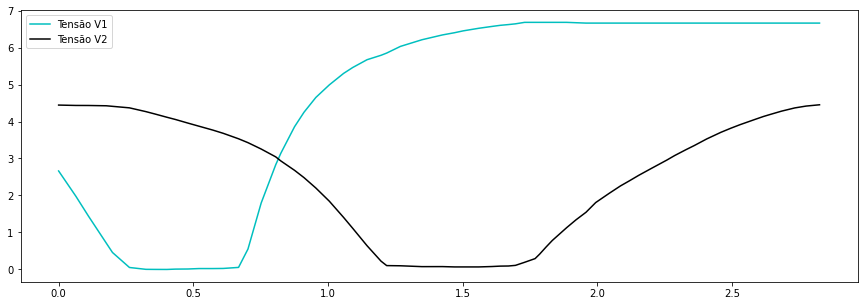

In [71]:
#Plotando dados
plt.figure(figsize=(15,5))
plt.plot(dados_target, dados_entrada.T[0],'c')
plt.plot(dados_target, dados_entrada.T[1],'k')
plt.legend(["Tensão V1", "Tensão V2"])

Em seguida, vamos iniciar o estágio de pre-processamento dos dados, onde iremos separar os dados em dados de *teste* e dados de *treinamento*. Para isso, utilizaremos a função **train_test_split**. Nesta função, o paramentro *test_size* determina a porcentagem dos dados que será utilizada para teste.

In [72]:
X_treino, X_teste, y_treino, y_teste = train_test_split(dados_entrada,dados_target, test_size=0.25)
print("Quantidade de registros usandos para treino",X_treino.shape[0])
print("Quantidade de registros usandos para teste",X_teste.shape[0])

Quantidade de registros usandos para treino 50
Quantidade de registros usandos para teste 17


Vamos agora utilizar iniciar a implementação da **Rede Neural** utilizando a ferramenta *Keras*. Essa ferramenta possui funções prontas, especificas para trabalhar com deep Learning.

Para isso, vamos iniciar importando as dependencias. Importaremos a classe Sequencial, pois vamos trabalhar com o modelo Sequencial, baseado na ideia dos pesos fluindo da camada de entrada para a camada oculta e para a camada de saída. Também vamos importar a classe Dense, pois trabalharemos com uma rede neural do tipo Densa, ou seja, cada um dos neuronios conectam-se com todos os outros. Conforme imagem abaixo:


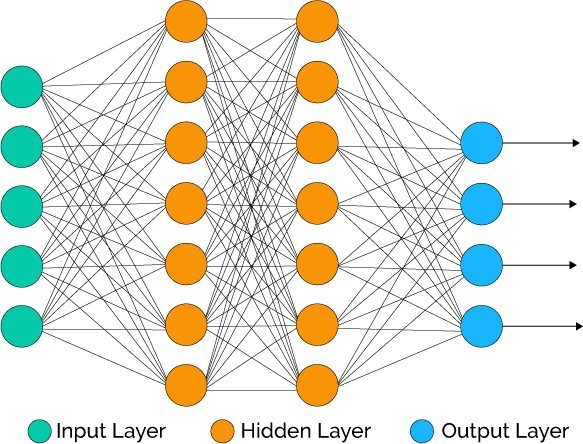

In [73]:
#from keras.models import Sequential
#from keras.layers import Dense

Agora vamos efetivamente criar a nossa rede neural:

In [74]:
model_net = Sequential()

Realizar a configuração da rede neural, com a criação das camadas ocultas e a camada de saída. O método *.add()* cria uma nova camada, dentro desse método, vamos passar um objeto do tipo Denso (*Dense()*). Nesse objeto existe alguns parametros que podemos passar, vamos utilizar o parametro "units" que indica quantos neurônios nós teremos nesta determinada camada oculta. Além disso, passamos qual será a *função de ativação*, onde utilizaremos a "relu", que é a função recomendada. Por fim, na primeira camada é necessário passar o parametro "input_dim", informando o numero de entradas da rede.

In [75]:
model_net.add(Dense(units=4,activation='relu'))
model_net.add(Dense(units=2,activation='relu'))#Mais uma camada
model_net.add(Dense(units=1)) #Camada de saída

Vamos agora compilar a nossa rede neural, passando alguns parametros:

Optimizer: Indica como faremos o ajuste dos pesos. Utilizaremos o padrão 'adam'

loss: Função de perda. Utilizaremos a função mean_squared_error, do calculo da raiz quadrada.

metrics: Metricas a serem utilizadas. Passaremos a métrica 'accuracy', que nada mais é do que a precisão do modelo.

In [76]:
model_net.compile(optimizer='adam', loss='mean_squared_error')

Dando prosseguimento, realizaremos o treinamento da rede neural, utlizando para isso a função .fit(). Para vizualizar as informações de maneira mais clara, vamos salvar os resultados do treinamento em uma variável.

Explicando alguns parametros utilizados na função .fit():


*   **batch_size**: De quantos em quantos registros que a atualização de pesos é feita. Por exemplo se utilizarmos o valor 5, ele irá calcular o erro para 5 registros e depois atualizará os pesos.
*   **epochs**: Numero de épocas que queremos que seja executadas o ajuste dos pesos.
*   **verbose**: Modo de verbosidade, utilizaremos o valor 0 para indicar verbosidade silenciosa. Poderiamos por exemplo usar o valor 2 para termos uma barra de progresso, etc...



In [77]:
resultados_teste = model_net.fit(X_treino, y_treino, epochs=1000, batch_size=4,verbose=0)

Verificando os dados de perda do treinamento e sua evolução:

In [78]:

model_net.evaluate(X_treino, y_treino, verbose=2)

2/2 - 0s - loss: 0.0271 - 105ms/epoch - 52ms/step


0.027076242491602898

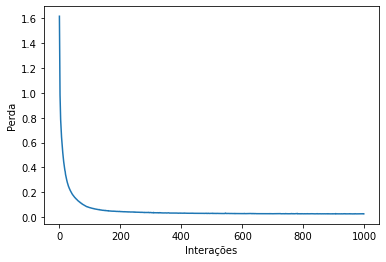

In [79]:
plt.plot(resultados_teste.history['loss'])
#Gráfico para visualizaçao da taxa de perda no decorrer das iterações
plt.xlabel('Interações')
plt.ylabel('Perda')
plt.show()

Vamos aplicar o modelo agora nos dados de teste, tentando relaizar a predição:

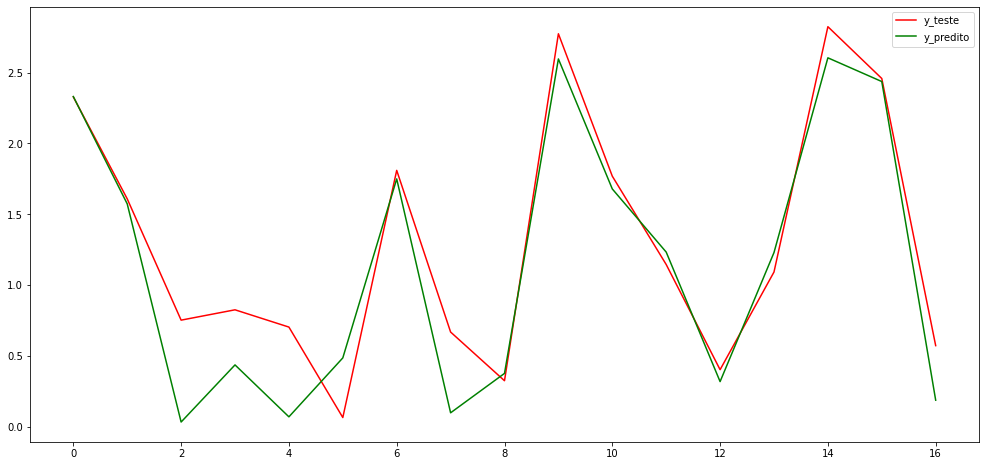

In [80]:
y_pred = model_net.predict(X_teste)
#Plotando os dados de predição e os dados reais (para teste)
plt.figure(figsize=(17,8))
plt.plot(y_teste,'r')
plt.plot(y_pred,'g')
plt.legend(["y_teste", "y_predito"])

Vamos utilizar todos os dados de entrada no modelo e comparar o seu resultado predido com os dados reais de target:

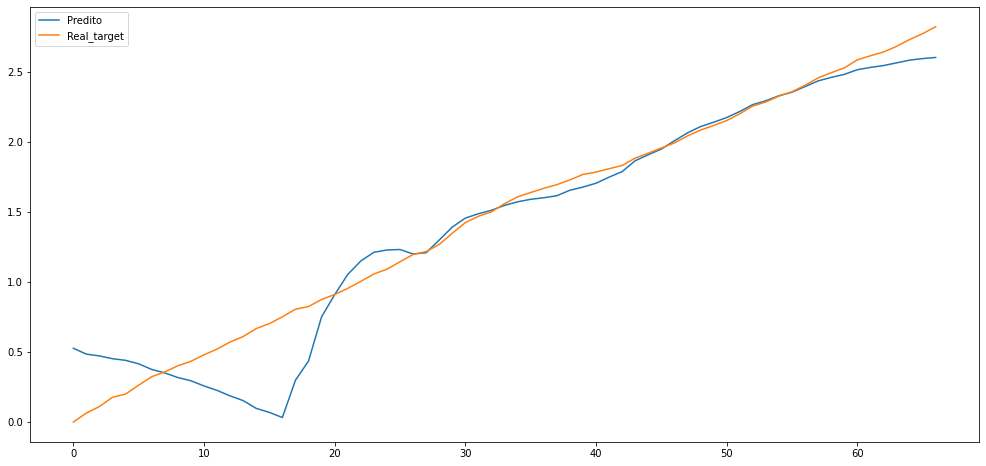

In [81]:
y_pred = model_net.predict(dados_entrada)

plt.figure(figsize=(17,8))
plt.plot(y_pred)
plt.plot(dados_target)
plt.legend(["Predito", "Real_target"])

Por fim, vamos caluclar o coeficiente de determinação R2 usando a funçao r2_score, onde a melhor pontuação possível é 1,0. Calcularemos também a Perda de regressão de erro quadrático médio.

In [82]:

print("Socre R: ")
print(r2_score(dados_target, y_pred))


print("\nPerda de regressão de erro quadrático médio: ")
print(mean_squared_error(dados_target, y_pred))

Socre R: 
0.9277028156417901

Perda de regressão de erro quadrático médio: 
0.04786090914607893


## Questão 2
 *A partir da análise de um processo de destilação fracionada de petróleo observou-se que determinado óleo
poderia ser classificado em duas classes de pureza {C1 e C2}, mediante a medição de três grandezas {x1
, x2
e x3} que representam algumas das propriedades físico-químicas do óleo. A equipe de engenheiros pretende
utilizar uma Rede Neural Artificial (RNA) como motor de um sensor inferencial para executar a
classificação automática destas duas classes. Assim, baseadas nas informações coletadas do processo,
formou-se o conjunto de treinamento em anexo2
, tomando por convenção o valor –1 para óleo pertencente à
classe C1 e o valor +1 para óleo pertencente à classe C2. Daí, pede-se:*



### letra a:
*Execute 2 treinamentos para a sua RNA, inicializando-se o vetor de pesos e bias em cada
treinamento com valores aleatórios entre zero e um. Se for o caso, reinicie o gerador de números
aleatórios em cada treinamento de tal forma que os elementos do vetor de pesos e bias iniciais não
sejam os mesmos. Registre quantas épocas de treinamento foram necessárias em cada um dos
treinamentos. Considere como critério de desempenho do classificador a sua matriz de confusão
(taxa de acerto para todos os dados disponíveis acima de 80%).*

**Resolução | Questão 2, letra a:**

Vamos inicialmente realizar a importação dos dados. As bibliotecas já foram importadas no exercicio anterior.
Neste exercicio, vamos importar os dados de maneira automática. Por isso é necessario que a pasta disponibilizada "dados_exercicios" esteja dentro do MyDrive, em outras palavras, é necessario fazer o upload da pasta no drive:

In [83]:
dados_x_treinamento = []
dados_y_treinamento = []
with open("/content/drive/MyDrive/dados_exercicios/ex2/tab_treinamento1.dat") as file:

    for line in file.readlines():
        #print(line)
        data = line.split()
        dados_x_treinamento.append([float(i) for i in data[:3]])
        dados_y_treinamento.extend([int(float(i)) for i in data[3:4]])
    
dados_x_treinamento = np.asarray(dados_x_treinamento)
dados_y_treinamento = np.asarray(dados_y_treinamento)

Separando dados de treino e teste:

In [84]:
dados_x_treinamento.shape

(30, 3)

In [85]:
dados_y_treinamento.shape

(30,)

In [86]:
X_treino, X_teste, y_treino, y_teste = train_test_split(dados_x_treinamento,dados_y_treinamento, test_size=0.25) 
#X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(dados_x_treinamento,dados_y_treinamento, test_size=0.25) 

In [87]:
X_treino.shape

(22, 3)

In [88]:
y_treino.shape

(22,)

Conforme solicitado na questão, vamos iniciar o vetor de pesos e bias em cada
treinamento com valores aleatórios entre zero e um. No Keras, nós podemos determinar esse parametro utilizando o initializers.RandomUniform. No RandomUniform nós podemos passar os parametros minval=0., maxval=1. Dessa forma, estamos definindo limites inferiores e superiores para os intervalos de valores aleatórios a serem gerados, conforme documentação. Podemos definir esse initializers e atribui-lo aos parametros kernel_initializer (define a inicialização do vetor de pesos) e bias_initializer (define a inicialização do vetor de bias).

In [89]:
model1 = Sequential()
model2 = Sequential()

In [90]:


#Dois modelos, com duas camadas cada, precisamos de 4 vetores de pesos e bias:

initializer1 = initializers.RandomUniform(minval=0., maxval=1.)#reiniciando o gerador para que os elementos não sejam os mesmos
initializer2 = initializers.RandomUniform(minval=0., maxval=1.)#reiniciando o gerador para que os elementos não sejam os mesmos
initializer3 = initializers.RandomUniform(minval=0., maxval=1.)#reiniciando o gerador para que os elementos não sejam os mesmos
initializer4 = initializers.RandomUniform(minval=0., maxval=1.)#reiniciando o gerador para que os elementos não sejam os mesmos

In [91]:
#Configurações da RNA 1
model1.add(Dense(15,input_shape = X_treino[0].shape,activation='relu',kernel_initializer = initializer1,bias_initializer=initializer2))#usando agora a função de ativação sigmoid
model1.add(Dense(10,input_shape = X_treino[0].shape,activation='relu',kernel_initializer = initializer4,bias_initializer=initializer3))
model1.add(Dense(1)) #Camada de saída

#Configurações da RNA 2
model2.add(Dense(15,input_shape = X_treino[0].shape,activation='relu',kernel_initializer = initializer3,bias_initializer=initializer4))#usando agora a função de ativação sigmoid
model2.add(Dense(10,input_shape = X_treino[0].shape,activation='relu',kernel_initializer = initializer1,bias_initializer=initializer2))
model2.add(Dense(1)) #Camada de saída

In [92]:
#Visualizando os vetores atribuidos:(Apenas para fins de demostração)
first_layer_weights = model1.layers[0].get_weights()[0]
first_layer_biases  = model1.layers[0].get_weights()[1]
print("pesos da primeira camada",first_layer_weights)
print("\nbias da primeira camada",first_layer_weights)


pesos da primeira camada [[0.77137816 0.9633746  0.9790652  0.9564799  0.05754423 0.87193644
  0.989159   0.8226173  0.3329959  0.23924994 0.43954277 0.2737831
  0.8215103  0.7980015  0.78588843]
 [0.85982347 0.6238997  0.4243772  0.35361087 0.61353207 0.92470884
  0.65047956 0.7753124  0.5988265  0.73476076 0.06228685 0.5658537
  0.05881381 0.8575361  0.846612  ]
 [0.46842134 0.18272865 0.39227283 0.9754648  0.91549003 0.8979894
  0.08671081 0.73171043 0.6861583  0.84605    0.4924034  0.7342212
  0.62965727 0.73421526 0.6910461 ]]

bias da primeira camada [[0.77137816 0.9633746  0.9790652  0.9564799  0.05754423 0.87193644
  0.989159   0.8226173  0.3329959  0.23924994 0.43954277 0.2737831
  0.8215103  0.7980015  0.78588843]
 [0.85982347 0.6238997  0.4243772  0.35361087 0.61353207 0.92470884
  0.65047956 0.7753124  0.5988265  0.73476076 0.06228685 0.5658537
  0.05881381 0.8575361  0.846612  ]
 [0.46842134 0.18272865 0.39227283 0.9754648  0.91549003 0.8979894
  0.08671081 0.73171043 0.68

In [93]:
#Compilando as redes
model1.compile(optimizer='adam', loss='mean_squared_error')
model2.compile(optimizer='adam', loss='mean_squared_error')

In [94]:

earlystopping = callbacks.EarlyStopping(monitor ="loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

Agora, vamos realizar o treinamento com os dados de treino inseridos anteriormente:

In [95]:
resultados_treino1 = model1.fit(X_treino, y_treino, epochs=1000,verbose=0, batch_size=4,callbacks =[earlystopping])
resultados_treino2 = model2.fit(X_treino, y_treino, epochs=1000, batch_size=4,verbose=0,callbacks =[earlystopping])

In [96]:
print(len(resultados_treino1.history['loss']))
print(len(resultados_treino2.history['loss']))

17
19


Mostrando o loss e a acurancia no decorrer do treinamento:

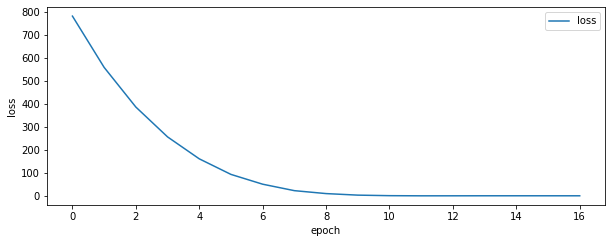

In [97]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(resultados_treino1.history['loss'])
plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['loss'],loc='upper right')


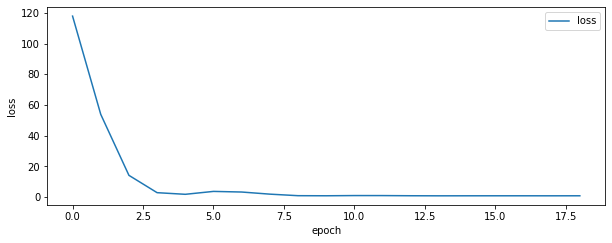

In [98]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(resultados_treino2.history['loss'])
plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['loss'],loc='upper right')


In [99]:
model1.evaluate(X_treino, y_treino, verbose=2)

1/1 - 0s - loss: 1.6132 - 101ms/epoch - 101ms/step


1.6131598949432373

Tentando aplicar a predição utilizando os dados de teste:

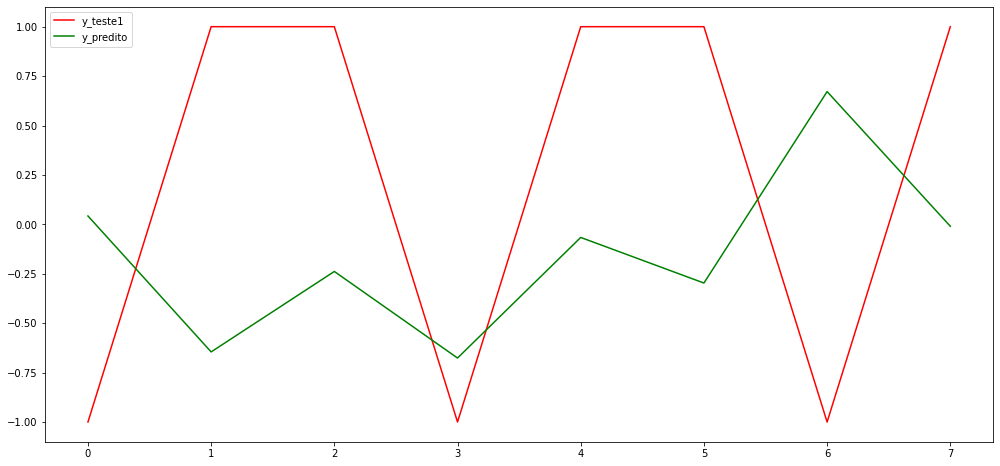

In [100]:
y_pred1 = model1.predict(X_teste)
#Plotando os dados de predição e os dados reais (para teste)
plt.figure(figsize=(17,8))
plt.plot(y_teste,'r')
plt.plot(y_pred1,'g')
plt.legend(["y_teste1", "y_predito"])

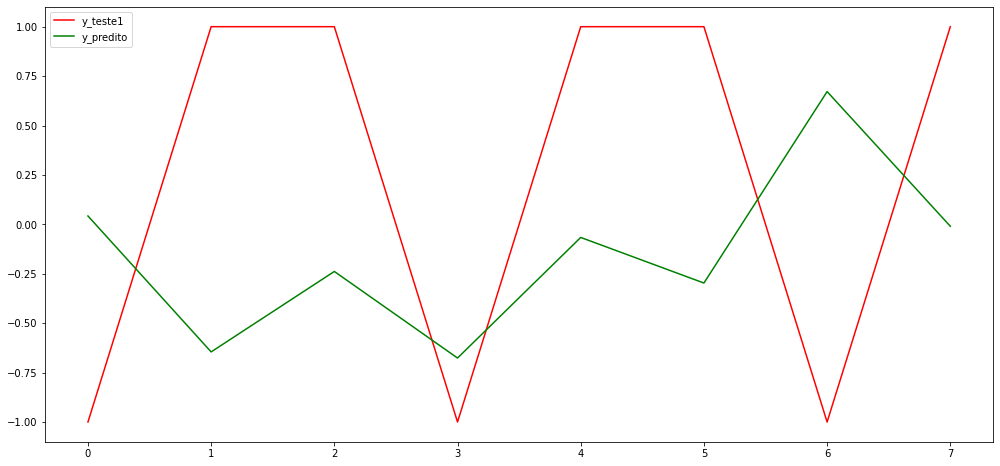

In [101]:
y_pred2 = model1.predict(X_teste)
#Plotando os dados de predição e os dados reais (para teste)
plt.figure(figsize=(17,8))
plt.plot(y_teste,'r')
plt.plot(y_pred2,'g')
plt.legend(["y_teste1", "y_predito"])

É possivel verificar que mesmo com uma quantidade grande de neuronios, o keras **não apresentou boa performace**. Logo, tetaremos outra biblioteca que disponibilize funções para trabalhar com redes neurais.

Como estamos tratando de um caso de classificação, vamos utilizar o **MLPClassifier** do sklearn.

In [102]:
from sklearn.neural_network import MLPClassifier

In [103]:
#definindo os modelos novamente
model1mlpc = MLPClassifier(hidden_layer_sizes=(5,),random_state=1,activation="identity",max_iter=3000)
model2mlpc = MLPClassifier(hidden_layer_sizes=(5,),random_state=1,activation="identity",max_iter=3000)

In [104]:
#first_layer_weights = model1mlpc.coefs_
#first_layer_biases  = model1mlpc.intercepts_
#print("pesos da primeira camada",first_layer_weights)
#print("\nbias da primeira camada",first_layer_weights)

O parametro "random_state" garante que os valores dos vetores de pesos e bias sejam aleatórios e entre zero e um, conforme pedido.

Em seguida, vamos treinar o modelo:

In [105]:
model1mlpc.fit(X_treino, y_treino)
model2mlpc.fit(X_treino, y_treino)

MLPClassifier(activation='identity', hidden_layer_sizes=(5,), max_iter=3000,
              random_state=1)

Utilizando a função "score" para verificar a precisão média nos dados e rótulos de teste fornecidos.

In [106]:
print("score treino 1 =",model1mlpc.score(X_teste, y_teste))
print("score treino 2 =",model2mlpc.score(X_teste, y_teste))

score treino 1 = 1.0
score treino 2 = 1.0


Indicando o numero de épocas utilizados:

In [107]:

print("Modelo 1:", len(model1mlpc.loss_curve_), "épocas")
print("Modelo 2:", len(model2mlpc.loss_curve_), "épocas")

Modelo 1: 1782 épocas
Modelo 2: 1782 épocas


Verificando a curva de perda:

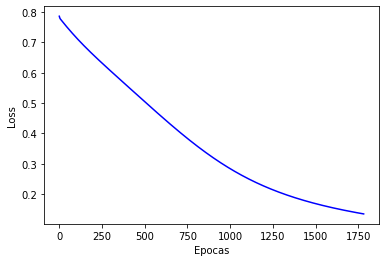

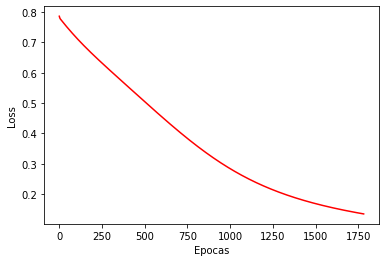

In [108]:

plt.figure()
plt.plot(model1mlpc.loss_curve_,'b')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(model2mlpc.loss_curve_,'r')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.show()

Realizadno então a validação com os dados de teste:

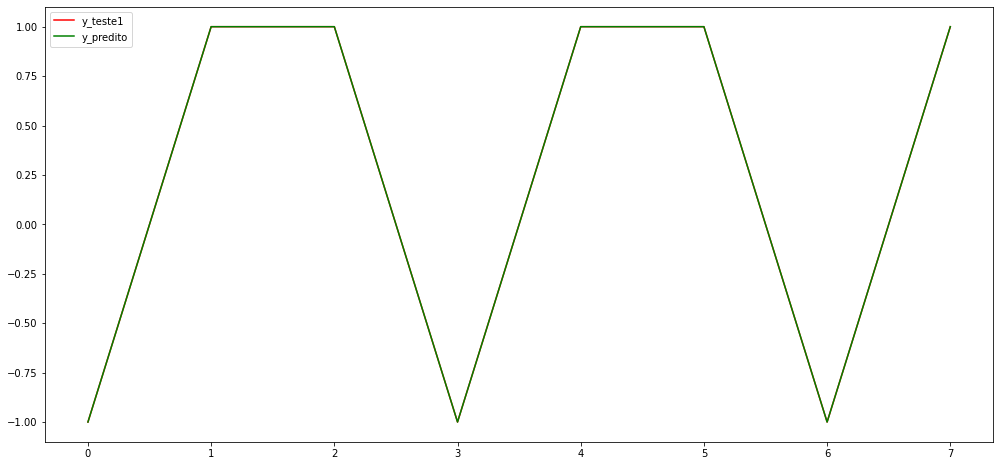

In [109]:
y_pred1 = model1mlpc.predict(X_teste)
#Plotando os dados de predição e os dados reais (para teste)
plt.figure(figsize=(17,8))
plt.plot(y_teste,'r')
plt.plot(y_pred1,'g')
plt.legend(["y_teste1", "y_predito"])

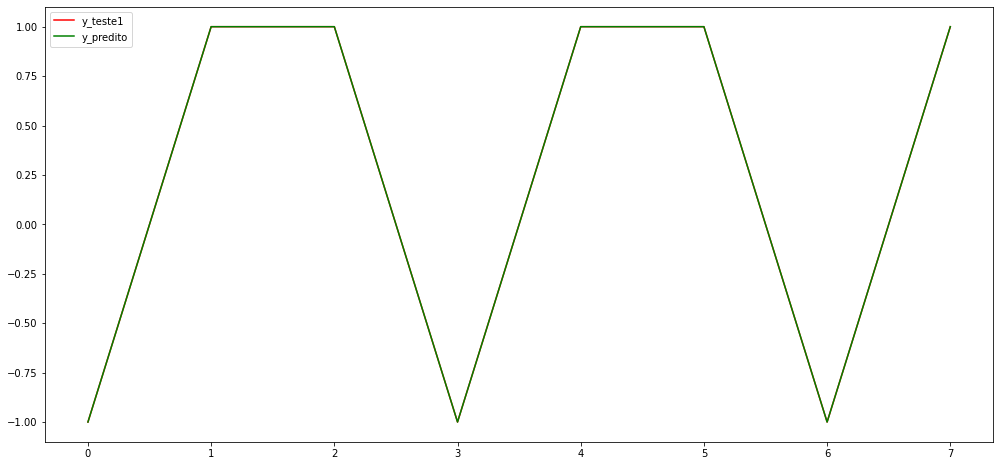

In [110]:
y_pred2 = model2mlpc.predict(X_teste)
#Plotando os dados de predição e os dados reais (para teste)
plt.figure(figsize=(17,8))
plt.plot(y_teste,'r')
plt.plot(y_pred1,'g')
plt.legend(["y_teste1", "y_predito"])

Agora, conforme pedido na questão, vamos verificar o desempenho, considerando o critério de desempenho do classificador a sua matriz de confusão
(taxa de acerto para todos os dados disponíveis acima de 80%).


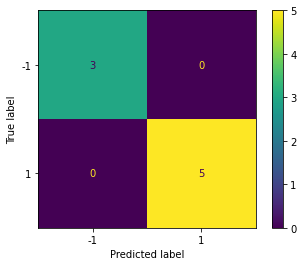

In [111]:
#matriz do treino 1
cm1 = confusion_matrix(y_teste, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model1mlpc.classes_)
disp.plot()
plt.show()

Na matriz acima, vemos que 3 valores

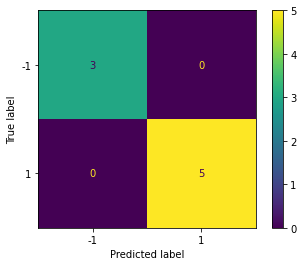

In [112]:
#matriz do treino 1
cm2 = confusion_matrix(y_teste, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model2mlpc.classes_)
disp.plot()
plt.show()

### letra b:
*Após o treinamento das RNAs, aplique-as na classificação automática de novas amostras de óleo
(ver arquivo tab_teste1.dat), indicando-se na tabela seguinte os resultados das saídas (Classes)
referentes aos dois processos de treinamento realizados no item a..*

**Resolução | Questão 2, letra b:**

Assim como na letra a, vamos realizar a importação dos dados.

In [113]:
dados_x_teste = []

with open("/content/drive/MyDrive/dados_exercicios/ex2/tab_teste1.dat") as file:

    for line in file.readlines():
        #print(line)
        data = line.split()
        dados_x_teste.append([float(i) for i in data[:3]])
    
dados_x_teste = np.asarray(dados_x_teste)



In [114]:
dados_x_teste

array([[-0.3565,  0.062 ,  5.9891],
       [-0.7842,  1.1267,  5.5912],
       [ 0.3012,  0.5611,  5.8234],
       [ 0.7757,  1.0648,  8.0677],
       [ 0.157 ,  0.8028,  6.304 ],
       [-0.7014,  1.0316,  3.6005],
       [ 0.3748,  0.1536,  6.1537],
       [-0.692 ,  0.9404,  4.4058],
       [-1.397 ,  0.7141,  4.9263],
       [-1.8842, -0.2805,  1.2548]])

Aplicando a classificação nos dados recem inseridos:

In [115]:
y_pred_1 = model1mlpc.predict(dados_x_teste)
y_pred_2 = model2mlpc.predict(dados_x_teste)

Adicionando os dados na tabela disponibilizada:

In [116]:
tabela = np.append(dados_x_teste, np.vstack((y_pred_1, y_pred_2)).T, axis=1)

pd.DataFrame(tabela, columns=["x1","x2","x3","y1", "y2"])

,x1,x2,x3,y1,y2
0,-0.3565,0.0620,5.9891,-1.0,-1.0
1,-0.7842,1.1267,5.5912,1.0,1.0
2,0.3012,0.5611,5.8234,1.0,1.0
3,0.7757,1.0648,8.0677,1.0,1.0
4,0.1570,0.8028,6.3040,1.0,1.0
5,-0.7014,1.0316,3.6005,1.0,1.0
6,0.3748,0.1536,6.1537,-1.0,-1.0
7,-0.6920,0.9404,4.4058,1.0,1.0
8,-1.3970,0.7141,4.9263,-1.0,-1.0
9,-1.8842,-0.2805,1.2548,-1.0,-1.0


### letra c:
*Explique por que o número de épocas de treinamento varia a cada vez que se executa o treinamento da RNA.*

**Resolução | Questão 2, letra c:**

Durante a resolução do exercicio, foi utilizado, para uma mesma base de dados (treino e teste), dois treinamentos, onde cada treinamento possuía valores diferentes para o vetor de pesos e bias. Logo, o número de épocas de treinamento variou, devido essa alteração de valores. Essa variação dos valores de pesos e bias interefe no número de épocas necessarias para que aquele modelo aprenda.

## Questão 3
 *Valendo-se da base de dados reais referente a uma série de carga elétrica (dados de Potência Ativa
(PA)) de uma concessionária de energia elétrica do Rio de Janeiro que se encontra no arquivo
carga_eletrica.dat (ver ex3.zip ou carga_eletrica.xlsx), desenvolva um previsor neural que receba como
entradas as medições de PA nos instantes k-1, k-2 e k-24 (i.e. PA(k-1), PA(k-2) e PA(k-24)) e que
disponibilize na saída a potência ativa na hora corrente k (i.e. PA(k)). O previsor deverá realizar
previsões de 1 passo à frente. Os passos mínimos a serem seguidos para a construção dele são:*

### letra a:
*Visualização da série de carga (e.g., avaliar tendências, sazonalidades, se existem dados faltantes, ‘outliers’ etc.);*

**Resolução | Questão 3, letra a:**

Para visualizarmos a série de carga, inicialmente, vamos importar os dados já presentes no drive, de forma semelhante ao que fizemos no exercicio anterior:

In [117]:
file_name = '/content/drive/MyDrive/dados_exercicios/carga_eletrica.xlsx'
sheet_name = 'carga_eletrica'
df = pd.read_excel(file_name, sheet_name = sheet_name, header = 0)

In [118]:
df


,PA(MW)
0,2780.0
1,2580.0
2,2480.0
3,2400.0
4,2380.0
...,...
931,3280.0
932,3140.0
933,3040.0
934,2910.0


In [119]:
df= np.asarray(df['PA(MW)'])

Plotando gráfico para visualização dos dados:


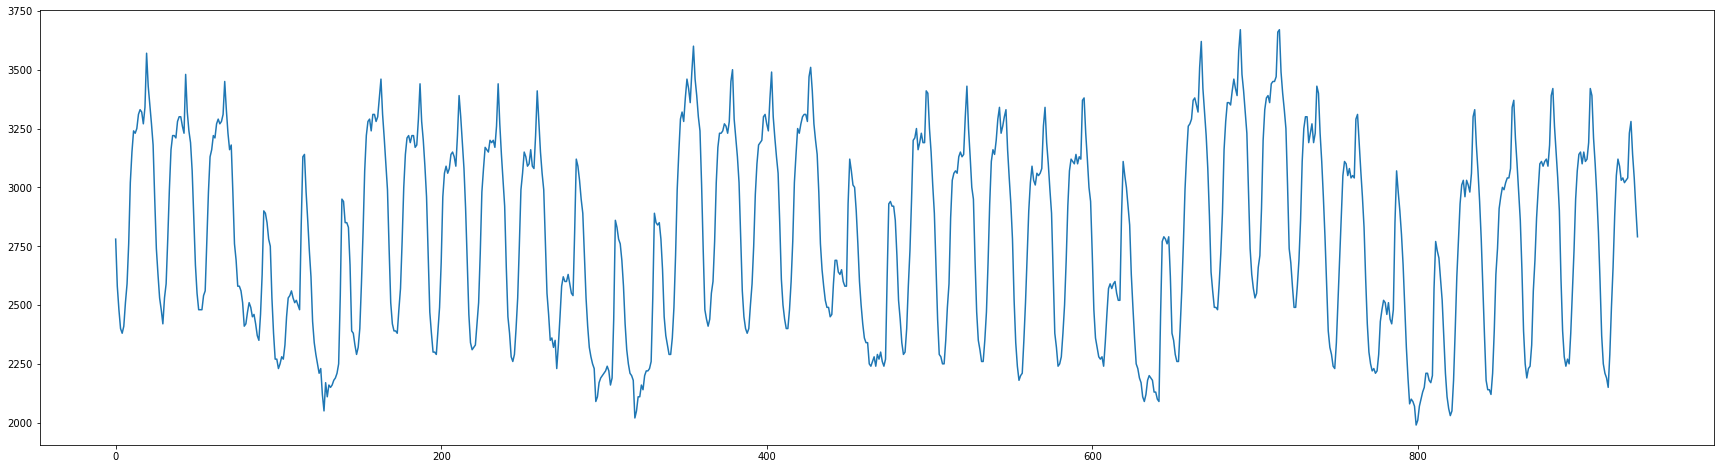

In [120]:
plt.figure(figsize=(30,8))
plt.plot(df)

Analisando os dados dispostos no gráfico, é possivel identificar um comportamento sazonal, vemos que em determinados periodos um padrão se repete. A tendencia observada de modo geral é de um comportamento senoidal, com tendencias de crescimento e queda ao decorrer das medições. Não foram identificados outliers ou dados faltates.

### letra b:

*Montagem dos padrões de entrada e de saída para fins de treinamento, validação e testes.*

**Resolução | Questão 3, letra b:**

Para seperação dos dados de entrada e saida para o modelo, foi utilizado a lógica apresentada sobre previsão recursiva, onde utilizando os valores das medições 24,23 e 1 eu posso obter previsão da medição 25, com os valores das medições 25,24 e 2 eu posso obter a previsão da medição 26, e assim sucessivamente. Dessa forma, teremos nos 3 entradas e uma saida:

In [121]:
#criando vetores de entrada
x_treinamento = [[],[],[]]
y_treinamento = []
for i in range(len(df)-24):
  y_treinamento.append(df[i+24])
  x_treinamento[0].append(df[i+23])
  x_treinamento[1].append(df[i+22])
  x_treinamento[2].append(df[i])

#transformando para array
x_treinamento = np.asarray(x_treinamento).T
y_treinamento = np.asarray(y_treinamento)

In [122]:
print(len(df))
print(len(x_treinamento))
print(len(y_treinamento))

936
912
912


In [123]:
x_treinamento

array([[3180., 3270., 2780.],
       [2950., 3180., 2580.],
       [2740., 2950., 2480.],
       ...,
       [3140., 3280., 3100.],
       [3040., 3140., 2970.],
       [2910., 3040., 2810.]])

### letra c:

*Definição da configuração do previsor neural, do algoritmo de treinamento etc;*

**Resolução | Questão 3, letra c:**

Utilizaremos a mesma biblioteca para confecção da rna, keras.

In [124]:
#iniciando o modelo
model_prev_series = Sequential()

In [125]:
#Criando as camadas e neuronios
model_prev_series.add(Dense(units=6,activation='relu',input_dim=3))
model_prev_series.add(Dense(units=3,activation='relu'))#Mais uma camada
model_prev_series.add(Dense(units=1)) #Camada de saída

In [126]:
#compilando o modelo com as caracteristicas.
model_prev_series.compile(optimizer='adam', loss='mape')

In [127]:
#treinando o modelo
resultados_treino = model_prev_series.fit(x_treinamento, y_treinamento, epochs=1000,verbose=0)

### letra d:

*Validação e testes-cegos dos previsores candidatos (Nota: considerar como índice de desempenho o ‘Mean Absolute Percentage Error’(MAPE)).*

**Resolução | Questão 3, letra d:**

Dando continuidade, vamos agora fazer a predição do modelo com os dados de entrada:

In [128]:
x_treinamento

array([[3180., 3270., 2780.],
       [2950., 3180., 2580.],
       [2740., 2950., 2480.],
       ...,
       [3140., 3280., 3100.],
       [3040., 3140., 2970.],
       [2910., 3040., 2810.]])

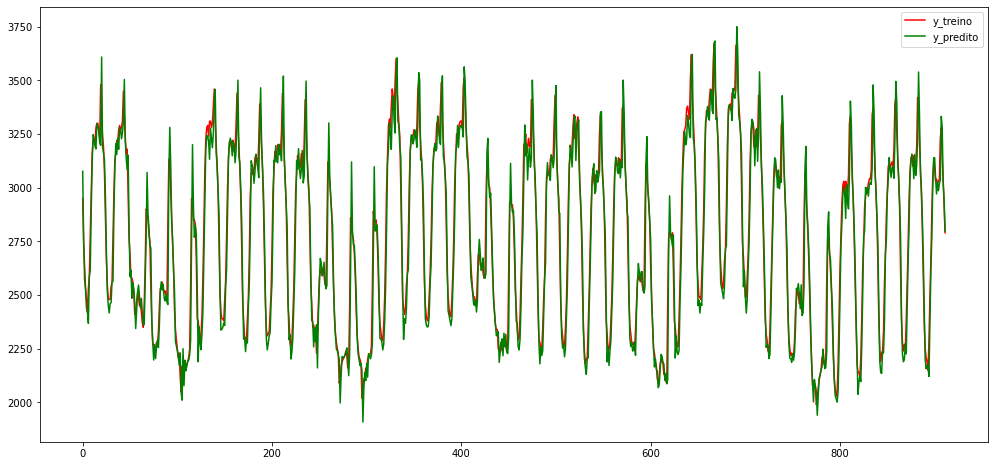

In [129]:
y_predicao = model_prev_series.predict(x_treinamento)
#Plotando os dados de predição e os dados reais (para teste)
plt.figure(figsize=(17,8))
plt.plot(y_treinamento,'r')
plt.plot(y_predicao,'g')
plt.legend(["y_treino", "y_predito"])

Vamos em seguida avaliar as métricas para este modelo. Conforme pedido na questão, vamos calcular o Mean Absolute Percentage Error’(MAPE), além do coeficiente de determinação R2:

In [130]:
print("Valor do MAPE: ",mean_absolute_percentage_error(y_treinamento, y_predicao))

Valor do MAPE:  0.02419087584721831


In [131]:
print("Valor do R2: ",r2_score(y_treinamento, y_predicao))

Valor do R2:  0.9492554429753188


Apartir do modelo treinado, espera-se que ele faça a previsão correta da proxima medição:

In [132]:

new_df = df.copy()

partida = len(new_df)
for i in range(1):
  handleData = np.array([[new_df[partida-24],new_df[partida-2],new_df[partida-1]]])
  
  new_data = model_prev_series.predict(handleData)
  
  new_df = np.append(new_df,new_data[0][0])
  partida=partida+1

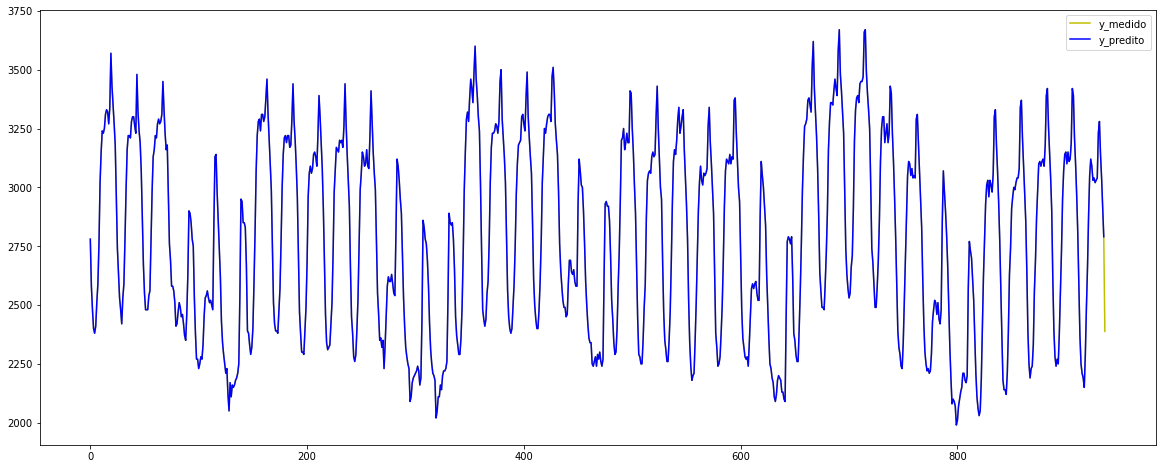

In [133]:

plt.figure(figsize=(20,8))
#plt.plot(df,'b')
plt.plot(new_df,'y')
plt.plot(df,'b')

plt.legend(["y_medido", "y_predito"])

PS. Apenas a nivel de curiosidade, tentei prever as proximas 24 horas apenas alterando o numero de interações no "for" da logica anterior:

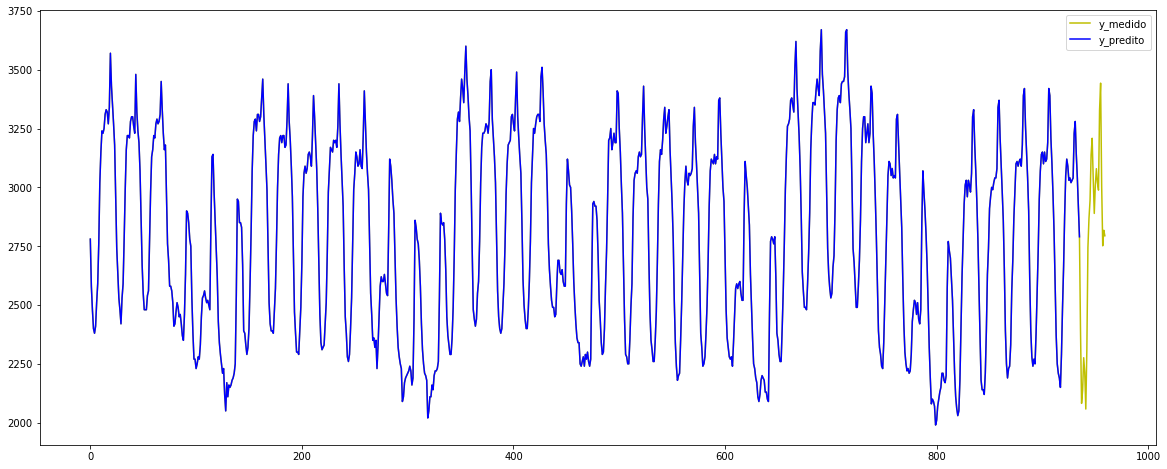

In [134]:
new_df = df.copy()

partida = len(new_df)
for i in range(24):
  handleData = np.array([[new_df[partida-24],new_df[partida-2],new_df[partida-1]]])
  
  new_data = model_prev_series.predict(handleData)
  
  new_df = np.append(new_df,new_data[0][0])
  partida=partida+1
plt.figure(figsize=(20,8))
#plt.plot(df,'b')
plt.plot(new_df,'y')
plt.plot(df,'b')

plt.legend(["y_medido", "y_predito"])

## Questão 4

### Análise da utilização de válvulas e conjuntos motor-IF-bomba como elementos finais de controle

Em meio a inumeras crises e problemas nos quais toda a sociedade vive nas ultimas decadas, em especial o Brasil, é cada vez mais recorrente e pertinente discussões acerca de como gerar novas soluções para o atendimento da crescente demanda energética. Atrelado a isso, existe fortemente a preoccupação em ofertar meios para que os processos industriais sejam cada vez mais limpos, com baixo consumo energético, também sempre em concordancia com as necessidades ambientais. Sabemos que a industria possui a posição de maior consumo energético do país. Em meio aos inumeros componentes, maquinários e sistemas de alto consumo energético, o sistema de bombeamento se destaca. Os sistemas de bombeamento são responsáveis por 18% da energia consumida por motores elétricos na indústria, sendo de grande importância a implementação de programas de eficiência energética neste setor.

Seja pela necessidade de diminuição ou contenção das despesas operacionais, ou pela necessidade de diminuição dos impactos ambientais, temos a utilização de novas soluções e tecnologicas como um forte aliado. As soluções apontadas como determinantes para a economia de energia nos sistemas de bombeamento são: substituição do motor standard por motor de alto rendimento, adequação da potência do motor à carga e utilização de inversores de frequência para controle de vazão. A variação da velocidade dos motores em sistemas de bombeamento, para controle de vazão e pressão, representa excelente oportunidade para redução do consumo de energia. A utilização de inversores de frequência em sistemas de bombeamento é viável quando o sistema apresenta condições de operação que necessitem de variação de vazão e pressão nas tubulações. Também quando há a necessidade do controle sobre a rotação, partida e desligamento do motor, com a finalidade de racionalizar o uso de energia elétrica.

De modo geral, a utilização de válvulas de estrangulamento, embora possua baixo custo de implementação e seja de fácil utilização, elas podem acarretar problemas de manutenção futura, como vazamentos e diminuição da vida útil dos equipamentos. Além disso, em situações onde as bombas trabalham com vazões inferiores à vazão mínima de projeto, as válvulas de controle operam em condições de estrangulamento extremo. Este estado é indesejável tanto para o controle da vazão como para a vida útil dessas válvulas. Por outro lado, a utilização de inversores de frequencia, embora possua um custo elevado de implementação, permite uma maior precisão no controle da vazão, aliada a uma significativa economia de energia; contribui também para redução do desgaste mecânico e da manutenção associada, redução da demanda de energia, economia de energia e na melhoria do fator de potência, além de permitir o controle da rotação com níveis mais baixos de tensão e corrente, o que reduz, conseqüentemente, a potência utilizada pelo motor.

Links utilizados:

* http://www.brasilengenharia.com/portal/images/stories/revistas/edicao609/609_art_inversors.pdf

* http://www.cgti.org.br/publicacoes/wp-content/uploads/2016/01/Utilizac%CC%A7a%CC%83o-do-Inversor-de-frequ%CC%88e%CC%82ncia-como-Agente-no-Aumento-da-Eficie%CC%82ncia-Energe%CC%81tica-em-Sistemas-de-Bombeamento.doc

